# Текстовое описание набора данных

В качестве набора данных используем датасет, содержащий топ 50 самых прослушиваемых песен в мире по версии Spotify. Этот датасет содержит несколько переменных с информацией о песнях.

Колонки:

ID
Track.Name - Название трека
Artist.Name - Название исполнителя
Genre - Жанр трека
Beats.Per.Minute - Темп песни
Energy - Энергия песни - Чем выше значение, тем более энергичная песня
Danceability - Чем выше значение, тем легче танцевать под эту песню
Loudness..dB.. - Чем выше значение, тем громче песня
Liveness - Чем выше значение, тем вероятнее, что песня живой записи
Valence - Чем выше значение, тем более позитивное настроение у этой песни
Length - Продолжительность песни
Acousticness - Чем больше значение, тем более песня акустическая
Speechiness - Чем выше значение, тем более говорящие слова содержит песня
Popularity - Чем выше значение, тем более популярна песня

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Загрузка данных
data = pd.read_csv('top50.csv', sep=",", encoding = "ISO-8859-1")

# Основные характеристики датасета

In [12]:
# удалим колонку с id, т.к. она не нужна
data.drop(data.columns[[0]], axis=1, inplace=True) 
# Первые 5 строк датасета
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [13]:
# Размер датасета
data.shape

(50, 13)

In [14]:
# Список колонок с типами данных
data.dtypes

Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [15]:
# Проверим наличие пустых значений
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Track.Name - 0
Artist.Name - 0
Genre - 0
Beats.Per.Minute - 0
Energy - 0
Danceability - 0
Loudness..dB.. - 0
Liveness - 0
Valence. - 0
Length. - 0
Acousticness.. - 0
Speechiness. - 0
Popularity - 0


In [16]:
# Основные статистические характеристки набора данных
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [17]:
# Определим уникальные значения для целевого признака
data['Popularity'].unique()

array([79, 92, 85, 86, 94, 84, 90, 87, 95, 93, 88, 82, 91, 83, 89, 70, 80,
       78], dtype=int64)

# Визуальное исследование датасета

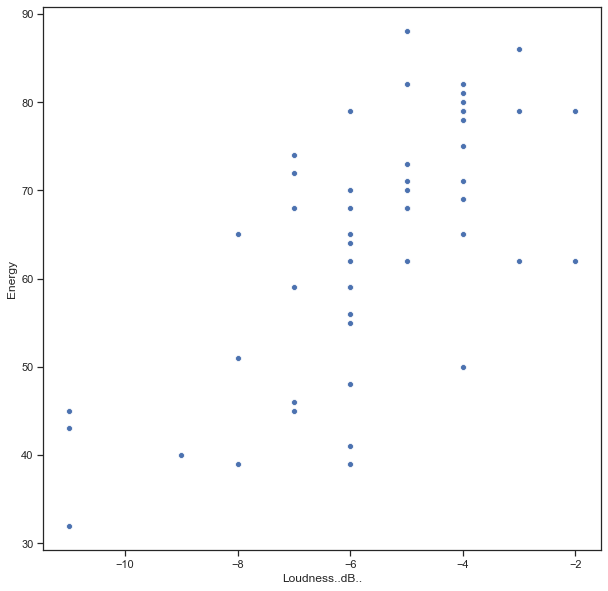

In [22]:
# Построение диаграммы рассеяния, пытаемся найти зависимость между громкостью и энергией песни
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Loudness..dB..', y='Energy', data=data)

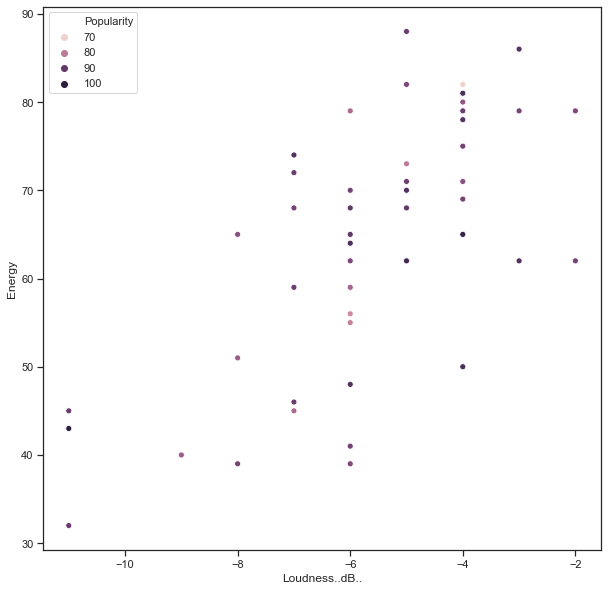

In [23]:
# Посмотрим также как влияет популярность
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Loudness..dB..', y='Energy', data=data, hue='Popularity')

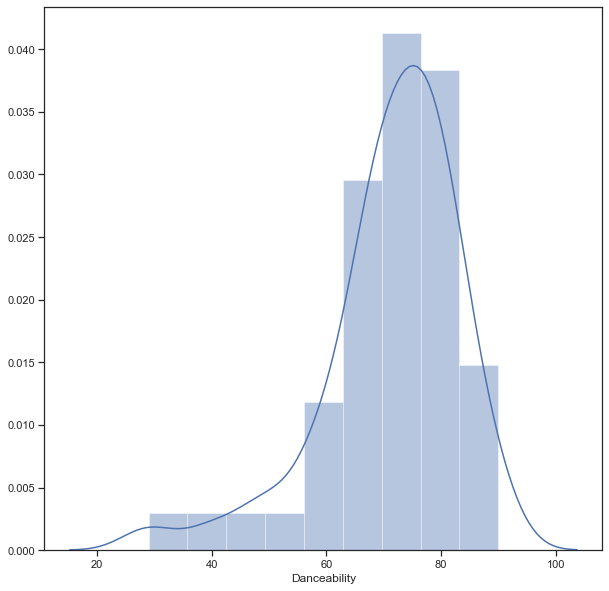

In [25]:
# Построение гистограммы для танцевальности песен
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Danceability'])

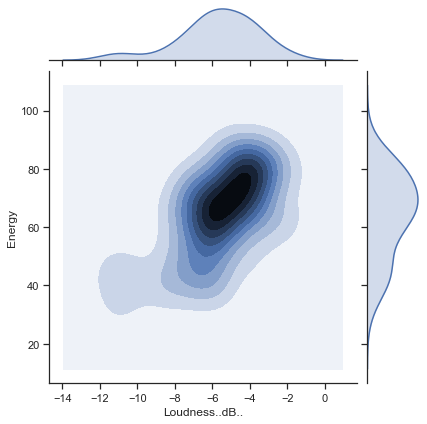

In [27]:
# Комбинация гистограмм и диаграмм рассеивания
sns.jointplot(x='Loudness..dB..', y='Energy', data=data, kind="kde")

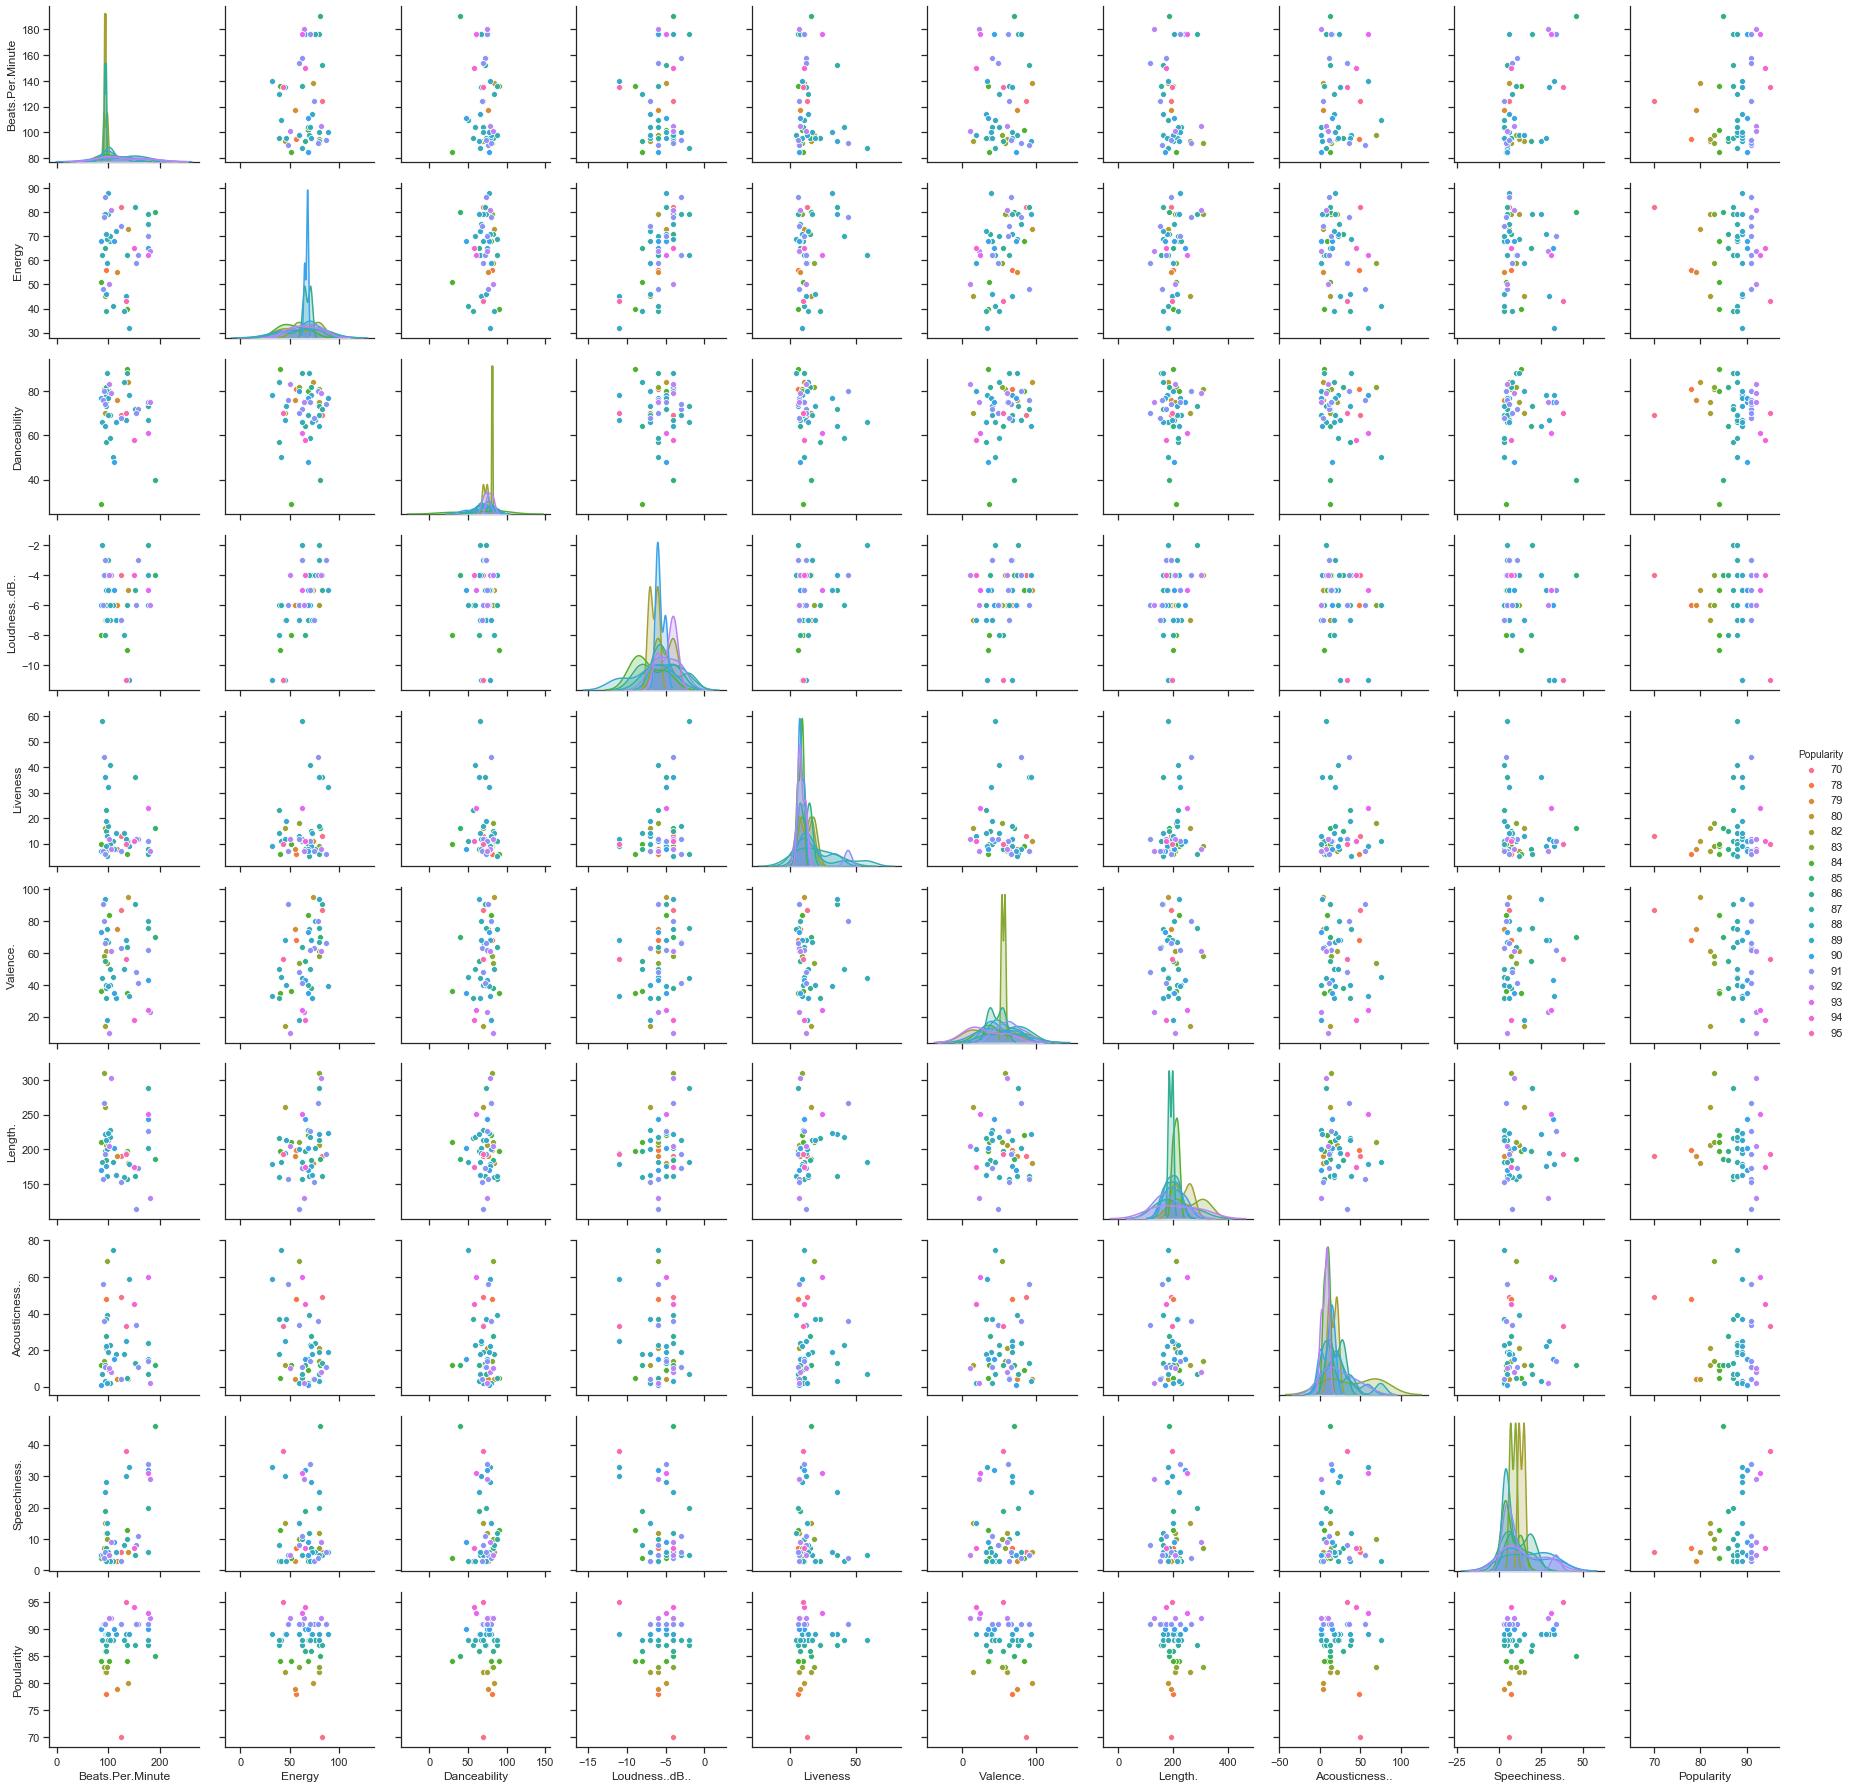

In [30]:
# Построение парных диаграмм
sns.pairplot(data, hue="Popularity")

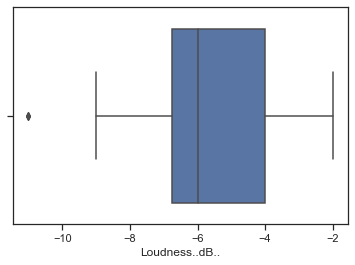

In [31]:
# Построение ящика с усами для громкости
sns.boxplot(x=data['Loudness..dB..'])

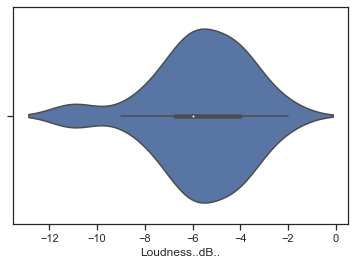

In [32]:
# Построение violin plot для громкости
sns.violinplot(x=data['Loudness..dB..'])

# Информация о корреляции признаков

In [18]:
# Построение корреляционной матрицы
data.corr()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


Можно сделать вывод, что популярность больше всего коррелирует с позитивностью(Valence),Speechiness и темпом(Beats.Per.Minute) песни.

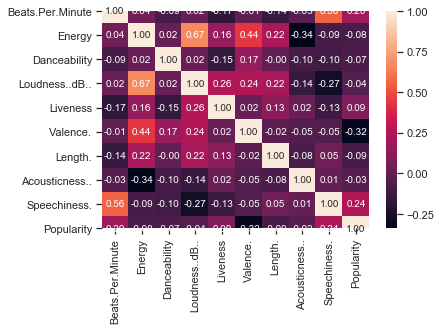

In [21]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')